◯　はじめに：学習済みモデルで検出してみよう


image 1/9 /Users/kenji/Downloads/Rinkou_CNN/Predict/IMG_3555.jpg: 640x384 1 person, 163.1ms
image 2/9 /Users/kenji/Downloads/Rinkou_CNN/Predict/IMG_3657.jpg: 640x384 1 person, 115.7ms
image 3/9 /Users/kenji/Downloads/Rinkou_CNN/Predict/IMG_3697.jpg: 640x384 1 person, 1 skateboard, 107.3ms
image 4/9 /Users/kenji/Downloads/Rinkou_CNN/Predict/IMG_3709.jpg: 640x384 1 person, 120.2ms
image 5/9 /Users/kenji/Downloads/Rinkou_CNN/Predict/IMG_3720.jpg: 640x384 1 person, 106.7ms
image 6/9 /Users/kenji/Downloads/Rinkou_CNN/Predict/IMG_3726.jpg: 640x384 1 person, 108.7ms
image 7/9 /Users/kenji/Downloads/Rinkou_CNN/Predict/IMG_3738.jpg: 640x384 1 person, 128.8ms
image 8/9 /Users/kenji/Downloads/Rinkou_CNN/Predict/istockphoto-1175492603-612x612.jpg: 448x640 1 person, 154.7ms
image 9/9 /Users/kenji/Downloads/Rinkou_CNN/Predict/istockphoto-481297254-612x612.jpg: 512x640 4 persons, 167.7ms
Speed: 6.0ms preprocess, 130.3ms inference, 2.1ms postprocess per image at shape (1, 3, 512, 640)
Results saved t

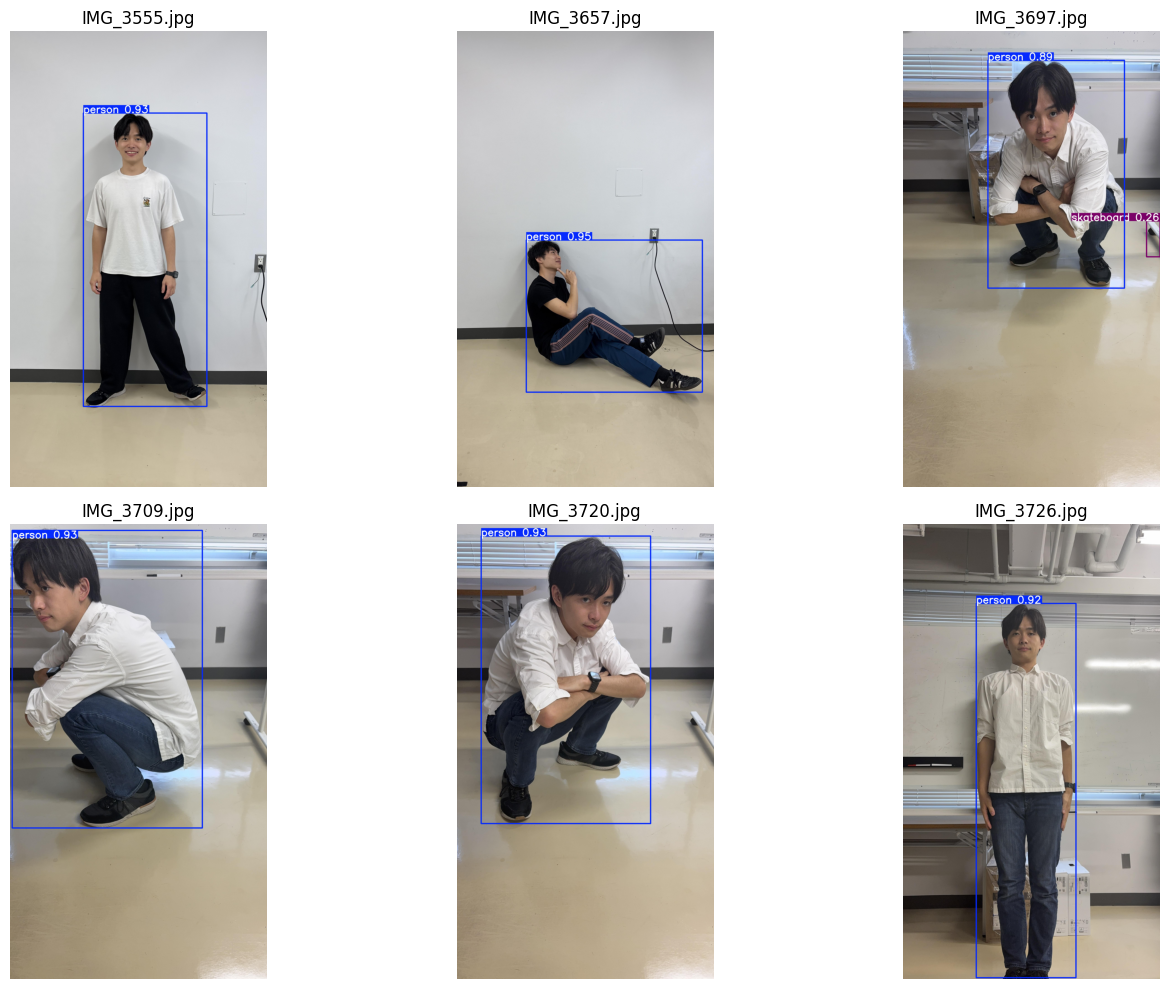

In [1]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2
from pathlib import Path
import shutil
import random

# ▼ 1. 学習前モデルによる推論
# 推論対象ディレクトリ
predict_source_dir = "Predict"
# 推論結果出力ディレクトリ
output_dir = "runs/detect/pre_yolov11n"

# すでに同名の出力フォルダがある場合は削除しておく（上書き対策）
if Path(output_dir).exists():
    shutil.rmtree(output_dir)

# モデルの読み込み（必要に応じてパスを変更）
model = YOLO("yolo11n.pt") 

# 推論実行
model.predict(
    source=predict_source_dir,
    save=True,
    project="runs/detect",
    name="pre_yolov11n",
    exist_ok=True
)

# ▼ 2. 結果画像の可視化
result_dir = Path(output_dir)
result_images = sorted(result_dir.glob("*.jpg")) + sorted(result_dir.glob("*.png"))

if not result_images:
    raise FileNotFoundError("事前推論の結果画像が見つかりません。")

# 最大6枚表示
num_to_show = min(6, len(result_images))
cols = 3
rows = (num_to_show + cols - 1) // cols

plt.figure(figsize=(cols * 5, rows * 5))
for i, img_path in enumerate(result_images[:num_to_show]):
    img = cv2.imread(str(img_path))
    if img is None:
        print(f"画像が読み込めません: {img_path}")
        continue
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(rows, cols, i + 1)
    plt.imshow(img_rgb)
    plt.axis("off")
    plt.title(f"{img_path.name}")

plt.tight_layout()
plt.show()


①　データセットを分割（学習用：検証用）

In [2]:

#========================================================================
#データセットの分割（学習：検証＝8:2）
#========================================================================

# 元データのパス
base_path = Path('.')
image_dir = base_path / 'dataset' / 'images'
label_dir = base_path / 'dataset' / 'labels'

# 出力先
output_base = base_path / 'train_dataset'
train_img_dir = output_base / 'train' / 'images'
train_lbl_dir = output_base / 'train' / 'labels'
valid_img_dir = output_base / 'valid' / 'images'
valid_lbl_dir = output_base / 'valid' / 'labels'

# ディレクトリ作成
for p in [train_img_dir, train_lbl_dir, valid_img_dir, valid_lbl_dir]:
    p.mkdir(parents=True, exist_ok=True)

# 画像ファイル一覧を取得（拡張子：jpg, png に対応）
image_files = list(image_dir.glob('*.jpg')) + list(image_dir.glob('*.png'))

# シャッフルして分割（例：80% train, 20% valid）
random.seed(42)
random.shuffle(image_files)
split_ratio = 0.8
split_index = int(len(image_files) * split_ratio)
train_files = image_files[:split_index]
valid_files = image_files[split_index:]

def copy_pair(files, dest_img_dir, dest_lbl_dir):
    for img_path in files:
        img_name = img_path.name
        label_name = img_path.with_suffix('.txt').name
        label_path = label_dir / label_name

        shutil.copy(img_path, dest_img_dir / img_name)
        if label_path.exists():
            shutil.copy(label_path, dest_lbl_dir / label_name)
        else:
            print(f'⚠️ ラベルが見つかりません: {label_name}')

# コピー処理
copy_pair(train_files, train_img_dir, train_lbl_dir)
copy_pair(valid_files, valid_img_dir, valid_lbl_dir)

print("✅ データセットの分割と配置が完了しました。")
print(f"出力先: {output_base}")
print(f"学習データ:検証データ＝ {split_ratio:.0%} : {1 - split_ratio:.0%} = {len(train_files)}枚 : {len(valid_files)}枚")


✅ データセットの分割と配置が完了しました。
出力先: train_dataset
学習データ:検証データ＝ 80% : 20% = 4枚 : 1枚


②　学習を行う（ファインチューニング）

In [ ]:
# #========================================================================
# # YOLOv11 学習実行(ファインチューニング)
# #========================================================================
# from ultralytics import YOLO



# #========================================================================
# # 学習条件
# train_data = 'dataset.yaml'
# train_epochs = 100 # 学習エポック数
# train_imgsz = 640 # 学習画像サイズ
# train_batch = 8 # バッチサイズ
# train_model = 'yolo11n.pt'
# #========================================================================


# # モデル読み込み
# model = YOLO(train_model)

# # 学習実行
# model.train(
#     data=train_data,
#     epochs=train_epochs,
#     imgsz=train_imgsz,
#     batch=train_batch,
#     patience = 0
# )



②-2　学習の結果を表示

In [ ]:
# #========================================================================
# #学習の結果
# #========================================================================
# from IPython.display import Image, display, Markdown
# from pathlib import Path

# # 最新のtrainディレクトリを取得
# train_dirs = sorted(Path("runs/detect").glob("train*"), key=lambda d: d.stat().st_mtime, reverse=True)
# latest_train_dir = train_dirs[0]

# # results.png のパス
# results_img_path = latest_train_dir / "results.png"

# # 学習条件の表示
# display(Markdown("✅ 使用した学習条件"))

# print("========================================================================")
# print("学習条件：")
# print(f"- データセット: {train_data}")
# print(f"- エポック数: {train_epochs}")
# print(f"- 画像サイズ: {train_imgsz}")
# print(f"- バッチサイズ: {train_batch}")
# print("========================================================================")

# # 結果画像の表示
# if results_img_path.exists():
#     display(Image(filename=str(results_img_path)))
# else:
#     print("学習結果の画像（results.png）が見つかりません。")

③-1　推論

In [ ]:
# #========================================================================
# #推論結果
# #========================================================================
# import matplotlib.pyplot as plt
# import cv2
# import os
# from pathlib import Path
# from ultralytics import YOLO

# # 最新のtrainディレクトリを取得（最終更新日時が新しい順）
# train_dirs = sorted(Path("runs/detect").glob("train*"), key=lambda d: d.stat().st_mtime, reverse=True)

# # 最新のbest.ptを取得
# latest_best = train_dirs[0] / "weights" / "best.pt"
# print(f"最新の学習モデル: {latest_best}")

# # モデルをロード
# model = YOLO(latest_best)

# #推論
# model.predict(
#     source="Predict",
#     save=True,
#     save_txt=False,
#     save_conf=True,
#     conf=0.25,
#     name="predict", 
#     show=False
# )

③-2　推論結果を表示

In [ ]:
# %matplotlib inline

# import matplotlib.pyplot as plt
# import cv2
# from pathlib import Path
# import os

# # 最新の predict フォルダ取得
# detect_dir = Path("runs/detect")
# predict_dirs = sorted(detect_dir.glob("predict*"), key=os.path.getmtime, reverse=True)
# if not predict_dirs:
#     raise FileNotFoundError("推論結果ディレクトリが見つかりません。")

# latest_predict_dir = predict_dirs[0]
# print(f"最新の推論結果フォルダ: {latest_predict_dir}")

# # 画像取得
# predicted_images = sorted(list(latest_predict_dir.glob("*.jpg")) + list(latest_predict_dir.glob("*.png")))

# # 最大6枚表示
# num_to_show = min(6, len(predicted_images))
# images_to_show = predicted_images[:num_to_show]

# # グラフ表示準備
# cols = 3
# rows = (num_to_show + cols - 1) // cols
# plt.figure(figsize=(cols * 5, rows * 5))

# for i, img_path in enumerate(images_to_show):
#     img = cv2.imread(str(img_path))
#     if img is None:
#         print(f"画像を読み込めませんでした: {img_path}")
#         continue
#     img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#     plt.subplot(rows, cols, i + 1)
#     plt.imshow(img_rgb)
#     plt.axis('off')
#     plt.title(img_path.name)

# plt.tight_layout()
# plt.show()


④　ファインチューニング済みのモデルで推論（精度を比較）


image 1/9 /Users/kenji/Downloads/Rinkou_CNN/Predict/IMG_3555.jpg: 640x384 1 standing, 108.8ms
image 2/9 /Users/kenji/Downloads/Rinkou_CNN/Predict/IMG_3657.jpg: 640x384 1 sitting, 160.3ms
image 3/9 /Users/kenji/Downloads/Rinkou_CNN/Predict/IMG_3697.jpg: 640x384 1 sitting, 173.4ms
image 4/9 /Users/kenji/Downloads/Rinkou_CNN/Predict/IMG_3709.jpg: 640x384 1 sitting, 158.9ms
image 5/9 /Users/kenji/Downloads/Rinkou_CNN/Predict/IMG_3720.jpg: 640x384 1 sitting, 200.8ms
image 6/9 /Users/kenji/Downloads/Rinkou_CNN/Predict/IMG_3726.jpg: 640x384 1 standing, 106.4ms
image 7/9 /Users/kenji/Downloads/Rinkou_CNN/Predict/IMG_3738.jpg: 640x384 1 standing, 151.1ms
image 8/9 /Users/kenji/Downloads/Rinkou_CNN/Predict/istockphoto-1175492603-612x612.jpg: 448x640 1 sitting, 128.9ms
image 9/9 /Users/kenji/Downloads/Rinkou_CNN/Predict/istockphoto-481297254-612x612.jpg: 512x640 4 standings, 140.3ms
Speed: 4.9ms preprocess, 147.7ms inference, 1.4ms postprocess per image at shape (1, 3, 512, 640)
Results saved to

/var/folders/v_/_6bx39b16gzcbm4m9bpqv9c40000gn/T/ipykernel_49966/80918742.py:73: UserWarning: Glyph 25512 (\N{CJK UNIFIED IDEOGRAPH-63A8}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/v_/_6bx39b16gzcbm4m9bpqv9c40000gn/T/ipykernel_49966/80918742.py:73: UserWarning: Glyph 35542 (\N{CJK UNIFIED IDEOGRAPH-8AD6}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/opt/anaconda3/envs/rinkoucnn-env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 25512 (\N{CJK UNIFIED IDEOGRAPH-63A8}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/rinkoucnn-env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 35542 (\N{CJK UNIFIED IDEOGRAPH-8AD6}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


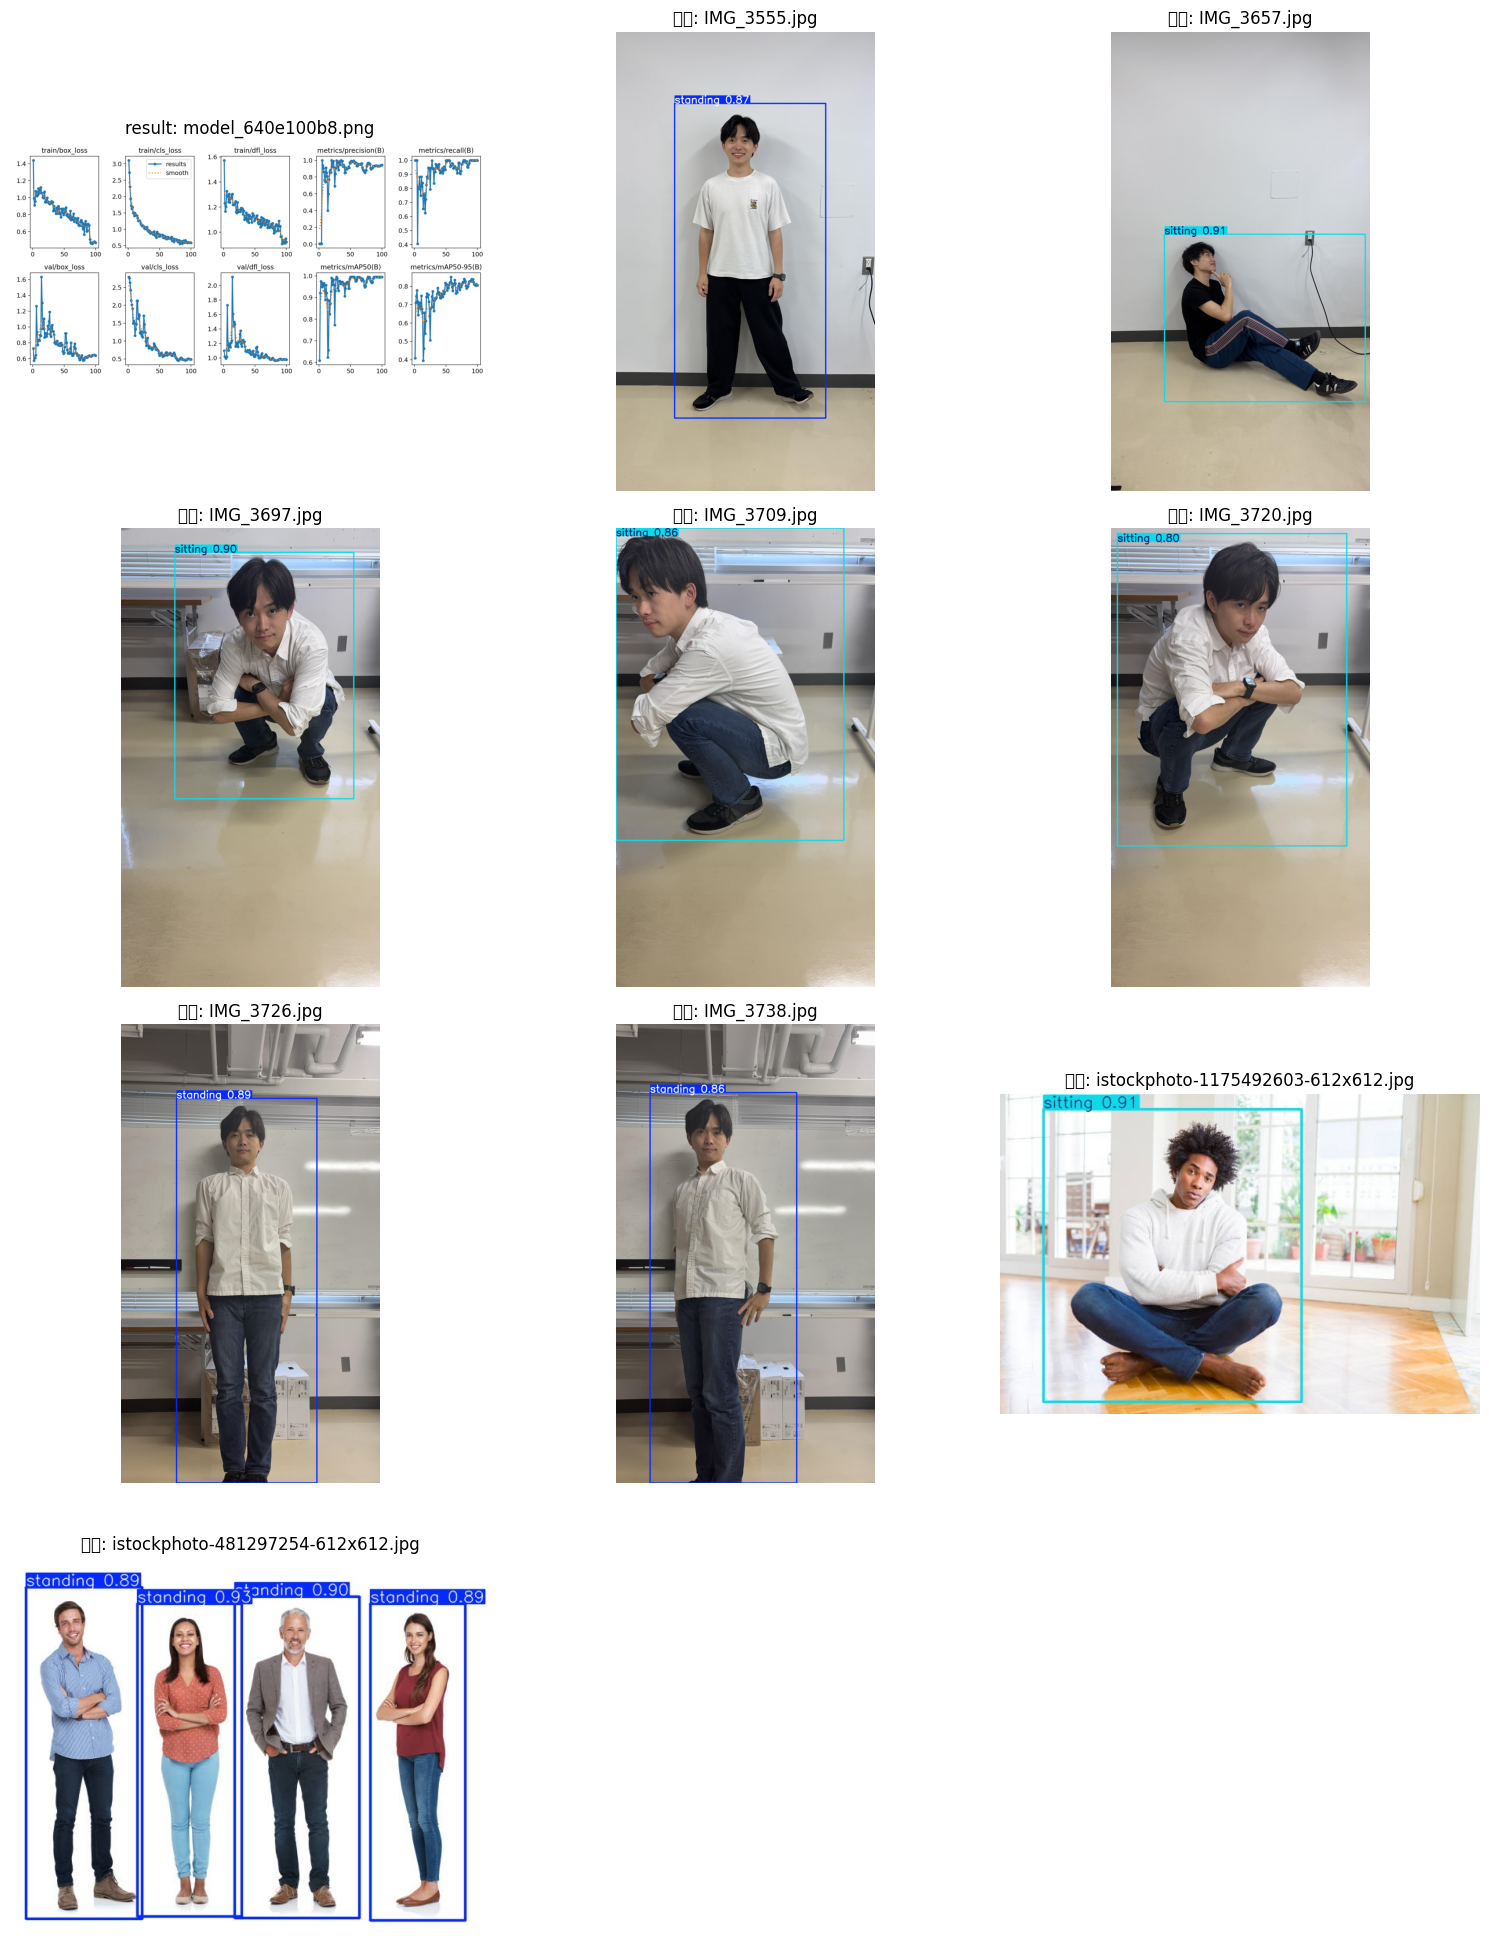

In [3]:
#========================================================================
# 精度を比較する：推論結果 + 学習時の結果画像 を表示
#========================================================================

from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2
from pathlib import Path
import shutil

#========================================================================
#========================================================================
# モデルの変更はここ（README参照）
model_name = "model_640e100b8.pt" 

#========================================================================
#========================================================================
# モデルパスと結果画像パス
model_path = Path("pretrained_models") / model_name
result_image_path = model_path.with_suffix(".png")  # 拡張子を .png に置き換え


# 推論
predict_source_dir = "Predict"
output_dir = "runs/detect/predict"

# 古い結果を削除
if Path(output_dir).exists():
    shutil.rmtree(output_dir)

# 推論
model = YOLO(str(model_path))
model.predict(
    source=predict_source_dir,
    save=True,
    project="runs/detect",
    name="predict",
    exist_ok=True
)

# 結果可視化（推論 + 学習結果画像）
result_dir = Path(output_dir)
pred_images = sorted(result_dir.glob("*.jpg")) + sorted(result_dir.glob("*.png"))
num_pred = min(10, len(pred_images))
cols = 3
rows = (num_pred + 1 + cols - 1) // cols  # +1: result.pngを加味

plt.figure(figsize=(cols * 5, rows * 5))

# 学習結果画像を最初に表示（もし存在すれば）
if result_image_path.exists():
    img = cv2.cvtColor(cv2.imread(str(result_image_path)), cv2.COLOR_BGR2RGB)
    plt.subplot(rows, cols, 1)
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"result: {result_image_path.name}")
    start_idx = 2
else:
    start_idx = 1

# 推論画像を表示
for i, img_path in enumerate(pred_images[:num_pred]):
    img = cv2.imread(str(img_path))
    if img is None:
        print(f"画像が読み込めません: {img_path}")
        continue
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(rows, cols, start_idx + i)
    plt.imshow(img_rgb)
    plt.axis("off")
    plt.title(f"推論: {img_path.name}")

plt.tight_layout()
plt.show()
